# Import

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import ast
import datetime
from sklearn.preprocessing import MultiLabelBinarizer
from scipy.stats import norm

warnings.filterwarnings("ignore")

# Merge Movies and Ratings

In [2]:
ratings = pd.read_csv('moviesRatings/ratings.csv')
moviesMetadata = pd.read_csv('moviesRatings/movies_metadata.csv')

In [3]:
# change id dtype to int
moviesMetadata['id'] = pd.to_numeric(moviesMetadata['id'], errors='coerce').astype('Int64')

# drop rows with id == NA
moviesMetadata = moviesMetadata.dropna(subset=["id"], axis=0) 

# inner join on movieID
merge_ratings = ratings.merge( moviesMetadata, left_on='movieId', right_on='id', how='inner')

# drop some columns 
merge_ratings = merge_ratings.drop(columns=['movieId', 'belongs_to_collection', 'homepage', 'poster_path', 'timestamp', 'video', 'status', 'original_title'], index=1)

# filter for users with more than 500 views
merge_ratings = merge_ratings[merge_ratings['userId'].isin(merge_ratings["userId"].value_counts()[merge_ratings["userId"].value_counts() > 500].index)] 
merge_ratings

,userId,rating,adult,budget,genres,id,imdb_id,original_language,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,tagline,title,vote_average,vote_count
50,229,3.0,False,0,"[{'id': 18, 'name': 'Drama'}, {'id': 9648, 'na...",110,tt0111495,fr,Red This is the third film from the trilogy by...,7.832755,"[{'name': 'Zespół Filmowy TOR', 'id': 38}, {'n...","[{'iso_3166_1': 'FR', 'name': 'France'}, {'iso...",1994-05-27,0.0,99.0,"[{'iso_639_1': 'fr', 'name': 'Français'}]",NaN,Three Colors: Red,7.8,246.0
175,741,4.0,False,0,"[{'id': 18, 'name': 'Drama'}, {'id': 9648, 'na...",110,tt0111495,fr,Red This is the third film from the trilogy by...,7.832755,"[{'name': 'Zespół Filmowy TOR', 'id': 38}, {'n...","[{'iso_3166_1': 'FR', 'name': 'France'}, {'iso...",1994-05-27,0.0,99.0,"[{'iso_639_1': 'fr', 'name': 'Français'}]",NaN,Three Colors: Red,7.8,246.0
448,1846,3.0,False,0,"[{'id': 18, 'name': 'Drama'}, {'id': 9648, 'na...",110,tt0111495,fr,Red This is the third film from the trilogy by...,7.832755,"[{'name': 'Zespół Filmowy TOR', 'id': 38}, {'n...","[{'iso_3166_1': 'FR', 'name': 'France'}, {'iso...",1994-05-27,0.0,99.0,"[{'iso_639_1': 'fr', 'name': 'Français'}]",NaN,Three Colors: Red,7.8,246.0
468,1932,4.5,False,0,"[{'id': 18, 'name': 'Drama'}, {'id': 9648, 'na...",110,tt0111495,fr,Red This is the third film from the trilogy by...,7.832755,"[{'name': 'Zespół Filmowy TOR', 'id': 38}, {'n...","[{'iso_3166_1': 'FR', 'name': 'France'}, {'iso...",1994-05-27,0.0,99.0,"[{'iso_639_1': 'fr', 'name': 'Français'}]",NaN,Three Colors: Red,7.8,246.0
612,2531,5.0,False,0,"[{'id': 18, 'name': 'Drama'}, {'id': 9648, 'na...",110,tt0111495,fr,Red This is the third film from the trilogy by...,7.832755,"[{'name': 'Zespół Filmowy TOR', 'id': 38}, {'n...","[{'iso_3166_1': 'FR', 'name': 'France'}, {'iso...",1994-05-27,0.0,99.0,"[{'iso_639_1': 'fr', 'name': 'Français'}]",NaN,Three Colors: Red,7.8,246.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11437631,270123,2.0,False,0,[],137072,tt1656194,en,Set in the immediate and random background of ...,0.366565,[],[],2013-05-31,0.0,80.0,"[{'iso_639_1': 'en', 'name': 'English'}]",NaN,The Comedian,3.7,3.0
11437632,270123,3.0,False,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",140222,tt1976989,en,When a young soldier in Vietnam gets dumped by...,6.617821,"[{'name': 'Deep Blue Pictures', 'id': 11165}, ...","[{'iso_3166_1': 'US', 'name': 'United States o...",2013-03-22,0.0,92.0,"[{'iso_639_1': 'en', 'name': 'English'}]",NaN,Love and Honor,5.8,135.0
11437633,270123,3.0,False,750000,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",151509,tt2526856,en,"The long awaited sequel to R. Kelly's ""Trapped...",0.433321,"[{'name': 'Relevant', 'id': 83440}, {'name': '...","[{'iso_3166_1': 'US', 'name': 'United States o...",2012-11-23,0.0,45.0,"[{'iso_639_1': 'en', 'name': 'English'}]",NaN,Trapped in the Closet: Chapters 23-33,6.5,4.0
11437634,270123,1.5,False,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",159109,tt2381355,en,"After being released from prison, a man known ...",1.515997,"[{'name': 'Also Known As Pictures', 'id': 12545}]","[{'iso_3166_1': 'US', 'name': 'United States o...",2013-01-21,0.0,97.0,"[{'iso_639_1': 'en', 'name': 'English'}]",A journey into darkness,The Rambler,6.0,14.0


In [4]:
# copies from movies.ipynb

#convert to the right data type
merge_ratings["adult"] = merge_ratings["adult"].astype(bool)
merge_ratings['release_date'] = pd.to_datetime(merge_ratings['release_date'])
merge_ratings['genres'] = merge_ratings['genres'].apply(ast.literal_eval)
merge_ratings['production_companies'] = merge_ratings['production_companies'].apply(ast.literal_eval)
merge_ratings['production_countries'] = merge_ratings['production_countries'].apply(ast.literal_eval)
merge_ratings['spoken_languages'] = merge_ratings['spoken_languages'].apply(ast.literal_eval)

#convert the dictionaries into arrays of ids
merge_ratings['production_countries_name'] = merge_ratings['production_countries'].apply(lambda x : [item["iso_3166_1"] for item in x] if isinstance(x, list) else [])
merge_ratings['spoken_languages_name'] = merge_ratings['spoken_languages'].apply(lambda x : [item["iso_639_1"] for item in x] if isinstance(x, list) else [])

merge_ratings['production_companies_name'] = merge_ratings['production_companies'].apply(lambda x : [item["name"] for item in x] if isinstance(x, list) else [])
merge_ratings['genre_name'] = merge_ratings['genres'].apply(lambda x : [item["name"] for item in x] if isinstance(x, list) else [])
merge_ratings

,userId,rating,adult,budget,genres,id,imdb_id,original_language,overview,popularity,...,runtime,spoken_languages,tagline,title,vote_average,vote_count,production_countries_name,spoken_languages_name,production_companies_name,genre_name
50,229,3.0,True,0,"[{'id': 18, 'name': 'Drama'}, {'id': 9648, 'na...",110,tt0111495,fr,Red This is the third film from the trilogy by...,7.832755,...,99.0,"[{'iso_639_1': 'fr', 'name': 'Français'}]",NaN,Three Colors: Red,7.8,246.0,"[FR, PL, CH]",[fr],"[Zespół Filmowy TOR, Le Studio Canal+, France ...","[Drama, Mystery, Romance]"
175,741,4.0,True,0,"[{'id': 18, 'name': 'Drama'}, {'id': 9648, 'na...",110,tt0111495,fr,Red This is the third film from the trilogy by...,7.832755,...,99.0,"[{'iso_639_1': 'fr', 'name': 'Français'}]",NaN,Three Colors: Red,7.8,246.0,"[FR, PL, CH]",[fr],"[Zespół Filmowy TOR, Le Studio Canal+, France ...","[Drama, Mystery, Romance]"
448,1846,3.0,True,0,"[{'id': 18, 'name': 'Drama'}, {'id': 9648, 'na...",110,tt0111495,fr,Red This is the third film from the trilogy by...,7.832755,...,99.0,"[{'iso_639_1': 'fr', 'name': 'Français'}]",NaN,Three Colors: Red,7.8,246.0,"[FR, PL, CH]",[fr],"[Zespół Filmowy TOR, Le Studio Canal+, France ...","[Drama, Mystery, Romance]"
468,1932,4.5,True,0,"[{'id': 18, 'name': 'Drama'}, {'id': 9648, 'na...",110,tt0111495,fr,Red This is the third film from the trilogy by...,7.832755,...,99.0,"[{'iso_639_1': 'fr', 'name': 'Français'}]",NaN,Three Colors: Red,7.8,246.0,"[FR, PL, CH]",[fr],"[Zespół Filmowy TOR, Le Studio Canal+, France ...","[Drama, Mystery, Romance]"
612,2531,5.0,True,0,"[{'id': 18, 'name': 'Drama'}, {'id': 9648, 'na...",110,tt0111495,fr,Red This is the third film from the trilogy by...,7.832755,...,99.0,"[{'iso_639_1': 'fr', 'name': 'Français'}]",NaN,Three Colors: Red,7.8,246.0,"[FR, PL, CH]",[fr],"[Zespół Filmowy TOR, Le Studio Canal+, France ...","[Drama, Mystery, Romance]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11437631,270123,2.0,True,0,[],137072,tt1656194,en,Set in the immediate and random background of ...,0.366565,...,80.0,"[{'iso_639_1': 'en', 'name': 'English'}]",NaN,The Comedian,3.7,3.0,[],[en],[],[]
11437632,270123,3.0,True,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",140222,tt1976989,en,When a young soldier in Vietnam gets dumped by...,6.617821,...,92.0,"[{'iso_639_1': 'en', 'name': 'English'}]",NaN,Love and Honor,5.8,135.0,[US],[en],"[Deep Blue Pictures, Red 56]","[Drama, Romance, War]"
11437633,270123,3.0,True,750000,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",151509,tt2526856,en,"The long awaited sequel to R. Kelly's ""Trapped...",0.433321,...,45.0,"[{'iso_639_1': 'en', 'name': 'English'}]",NaN,Trapped in the Closet: Chapters 23-33,6.5,4.0,[US],[en],"[Relevant, Fuzzy Bunny Productions]","[Comedy, Music, Mystery]"
11437634,270123,1.5,True,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",159109,tt2381355,en,"After being released from prison, a man known ...",1.515997,...,97.0,"[{'iso_639_1': 'en', 'name': 'English'}]",A journey into darkness,The Rambler,6.0,14.0,[US],[en],[Also Known As Pictures],"[Comedy, Drama, Horror, Mystery]"


# Merge Movies, Ratings, Keywords

In [5]:
# Contains the movie plot keywords for our MovieLens movies collected from the TMDB 
keywords = pd.read_csv('moviesRatings/keywords.csv')
keywords # id corresponds to movieID

,id,keywords
0,862,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,8844,"[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,15602,"[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."
3,31357,"[{'id': 818, 'name': 'based on novel'}, {'id':..."
4,11862,"[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n..."
...,...,...
46414,439050,"[{'id': 10703, 'name': 'tragic love'}]"
46415,111109,"[{'id': 2679, 'name': 'artist'}, {'id': 14531,..."
46416,67758,[]
46417,227506,[]


In [6]:
merge_kw = merge_ratings.merge(keywords, left_on="id", right_on="id", how="left")
merge_kw

,userId,rating,adult,budget,genres,id,imdb_id,original_language,overview,popularity,...,spoken_languages,tagline,title,vote_average,vote_count,production_countries_name,spoken_languages_name,production_companies_name,genre_name,keywords
0,229,3.0,True,0,"[{'id': 18, 'name': 'Drama'}, {'id': 9648, 'na...",110,tt0111495,fr,Red This is the third film from the trilogy by...,7.832755,...,"[{'iso_639_1': 'fr', 'name': 'Français'}]",NaN,Three Colors: Red,7.8,246.0,"[FR, PL, CH]",[fr],"[Zespół Filmowy TOR, Le Studio Canal+, France ...","[Drama, Mystery, Romance]","[{'id': 934, 'name': 'judge'}, {'id': 1533, 'n..."
1,741,4.0,True,0,"[{'id': 18, 'name': 'Drama'}, {'id': 9648, 'na...",110,tt0111495,fr,Red This is the third film from the trilogy by...,7.832755,...,"[{'iso_639_1': 'fr', 'name': 'Français'}]",NaN,Three Colors: Red,7.8,246.0,"[FR, PL, CH]",[fr],"[Zespół Filmowy TOR, Le Studio Canal+, France ...","[Drama, Mystery, Romance]","[{'id': 934, 'name': 'judge'}, {'id': 1533, 'n..."
2,1846,3.0,True,0,"[{'id': 18, 'name': 'Drama'}, {'id': 9648, 'na...",110,tt0111495,fr,Red This is the third film from the trilogy by...,7.832755,...,"[{'iso_639_1': 'fr', 'name': 'Français'}]",NaN,Three Colors: Red,7.8,246.0,"[FR, PL, CH]",[fr],"[Zespół Filmowy TOR, Le Studio Canal+, France ...","[Drama, Mystery, Romance]","[{'id': 934, 'name': 'judge'}, {'id': 1533, 'n..."
3,1932,4.5,True,0,"[{'id': 18, 'name': 'Drama'}, {'id': 9648, 'na...",110,tt0111495,fr,Red This is the third film from the trilogy by...,7.832755,...,"[{'iso_639_1': 'fr', 'name': 'Français'}]",NaN,Three Colors: Red,7.8,246.0,"[FR, PL, CH]",[fr],"[Zespół Filmowy TOR, Le Studio Canal+, France ...","[Drama, Mystery, Romance]","[{'id': 934, 'name': 'judge'}, {'id': 1533, 'n..."
4,2531,5.0,True,0,"[{'id': 18, 'name': 'Drama'}, {'id': 9648, 'na...",110,tt0111495,fr,Red This is the third film from the trilogy by...,7.832755,...,"[{'iso_639_1': 'fr', 'name': 'Français'}]",NaN,Three Colors: Red,7.8,246.0,"[FR, PL, CH]",[fr],"[Zespół Filmowy TOR, Le Studio Canal+, France ...","[Drama, Mystery, Romance]","[{'id': 934, 'name': 'judge'}, {'id': 1533, 'n..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
830745,270123,3.0,True,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",140222,tt1976989,en,When a young soldier in Vietnam gets dumped by...,6.617821,...,"[{'iso_639_1': 'en', 'name': 'English'}]",NaN,Love and Honor,5.8,135.0,[US],[en],"[Deep Blue Pictures, Red 56]","[Drama, Romance, War]","[{'id': 2957, 'name': 'vietnam war'}, {'id': 3..."
830746,270123,3.0,True,750000,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",151509,tt2526856,en,"The long awaited sequel to R. Kelly's ""Trapped...",0.433321,...,"[{'iso_639_1': 'en', 'name': 'English'}]",NaN,Trapped in the Closet: Chapters 23-33,6.5,4.0,[US],[en],"[Relevant, Fuzzy Bunny Productions]","[Comedy, Music, Mystery]",[]
830747,270123,1.5,True,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",159109,tt2381355,en,"After being released from prison, a man known ...",1.515997,...,"[{'iso_639_1': 'en', 'name': 'English'}]",A journey into darkness,The Rambler,6.0,14.0,[US],[en],[Also Known As Pictures],"[Comedy, Drama, Horror, Mystery]",[]
830748,270123,1.5,True,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",159109,tt2381355,en,"After being released from prison, a man known ...",1.515997,...,"[{'iso_639_1': 'en', 'name': 'English'}]",A journey into darkness,The Rambler,6.0,14.0,[US],[en],[Also Known As Pictures],"[Comedy, Drama, Horror, Mystery]",[]


In [7]:
print(f"""
intersection   {len(set(merge_ratings["id"]).intersection(set(keywords["id"])))}
ratings+movies {len(set(merge_ratings["id"]))}
keywords       {len(set(keywords["id"]))}
""")
# IDs in keywords are all present in ratings + movies df


intersection   7063
ratings+movies 7063
keywords       45432



## 55035 rows with blank keywords (remove from df)

In [8]:
merge_kw["keywords"].value_counts(dropna=False)

[]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       55035
[{'id': 187056, 'name': 'woman director'}]                                                                                                                                                                                                                                               

In [9]:
# drop rows without any keywords
merge_kw = merge_kw[merge_kw["keywords"] != "[]"].reset_index(drop=True)
merge_kw

,userId,rating,adult,budget,genres,id,imdb_id,original_language,overview,popularity,...,spoken_languages,tagline,title,vote_average,vote_count,production_countries_name,spoken_languages_name,production_companies_name,genre_name,keywords
0,229,3.0,True,0,"[{'id': 18, 'name': 'Drama'}, {'id': 9648, 'na...",110,tt0111495,fr,Red This is the third film from the trilogy by...,7.832755,...,"[{'iso_639_1': 'fr', 'name': 'Français'}]",NaN,Three Colors: Red,7.8,246.0,"[FR, PL, CH]",[fr],"[Zespół Filmowy TOR, Le Studio Canal+, France ...","[Drama, Mystery, Romance]","[{'id': 934, 'name': 'judge'}, {'id': 1533, 'n..."
1,741,4.0,True,0,"[{'id': 18, 'name': 'Drama'}, {'id': 9648, 'na...",110,tt0111495,fr,Red This is the third film from the trilogy by...,7.832755,...,"[{'iso_639_1': 'fr', 'name': 'Français'}]",NaN,Three Colors: Red,7.8,246.0,"[FR, PL, CH]",[fr],"[Zespół Filmowy TOR, Le Studio Canal+, France ...","[Drama, Mystery, Romance]","[{'id': 934, 'name': 'judge'}, {'id': 1533, 'n..."
2,1846,3.0,True,0,"[{'id': 18, 'name': 'Drama'}, {'id': 9648, 'na...",110,tt0111495,fr,Red This is the third film from the trilogy by...,7.832755,...,"[{'iso_639_1': 'fr', 'name': 'Français'}]",NaN,Three Colors: Red,7.8,246.0,"[FR, PL, CH]",[fr],"[Zespół Filmowy TOR, Le Studio Canal+, France ...","[Drama, Mystery, Romance]","[{'id': 934, 'name': 'judge'}, {'id': 1533, 'n..."
3,1932,4.5,True,0,"[{'id': 18, 'name': 'Drama'}, {'id': 9648, 'na...",110,tt0111495,fr,Red This is the third film from the trilogy by...,7.832755,...,"[{'iso_639_1': 'fr', 'name': 'Français'}]",NaN,Three Colors: Red,7.8,246.0,"[FR, PL, CH]",[fr],"[Zespół Filmowy TOR, Le Studio Canal+, France ...","[Drama, Mystery, Romance]","[{'id': 934, 'name': 'judge'}, {'id': 1533, 'n..."
4,2531,5.0,True,0,"[{'id': 18, 'name': 'Drama'}, {'id': 9648, 'na...",110,tt0111495,fr,Red This is the third film from the trilogy by...,7.832755,...,"[{'iso_639_1': 'fr', 'name': 'Français'}]",NaN,Three Colors: Red,7.8,246.0,"[FR, PL, CH]",[fr],"[Zespół Filmowy TOR, Le Studio Canal+, France ...","[Drama, Mystery, Romance]","[{'id': 934, 'name': 'judge'}, {'id': 1533, 'n..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
775710,267597,3.5,True,0,"[{'id': 80, 'name': 'Crime'}, {'id': 53, 'name...",136850,tt1510686,en,A naive college student loses a scholarship at...,2.142248,...,"[{'iso_639_1': 'en', 'name': 'English'}]",Seduction. Betrayal. Murder. What are best fri...,Breaking the Girls,5.2,26.0,[US],[en],[Myriad Pictures],"[Crime, Thriller]","[{'id': 10768, 'name': 'lesbian'}, {'id': 1870..."
775711,270123,1.0,True,0,[],55748,tt0387701,fi,NaN,0.002524,...,[],NaN,Ystäväni Henry,0.0,0.0,[],[],[],[],"[{'id': 187056, 'name': 'woman director'}]"
775712,270123,3.0,True,0,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...",116746,tt0016201,en,Armand and Marie survive in the streets until ...,0.001396,...,"[{'iso_639_1': 'en', 'name': 'English'}]",NaN,Parisian Love,0.0,0.0,[US],[en],[],"[Crime, Drama, Romance]","[{'id': 154802, 'name': 'silent film'}]"
775713,270123,3.5,True,0,"[{'id': 28, 'name': 'Action'}]",125249,tt0035665,en,Japanese master spy Daka operates a covert esp...,0.979481,...,"[{'iso_639_1': 'en', 'name': 'English'}]",A HUNDRED TIMES MORE THRILLING ON THE SCREEN!,The Bat Man,7.0,11.0,[US],[en],[Columbia Pictures Corporation],[Action],"[{'id': 849, 'name': 'dc comics'}, {'id': 9715..."


## Extract keywords IDs as a new column

In [10]:
import ast
def extract_ids(json_string):
    # try:
    lst_of_ids = []
    lst_of_kw = ast.literal_eval(json_string)
    for d in lst_of_kw:
        id = d["id"]
        lst_of_ids.append(id)
    return lst_of_ids 

# get new column, each row contains list of the movie's keywords IDs
merge_kw['keywords_id'] = merge_kw.apply(lambda row: extract_ids(row["keywords"]), axis=1)

merge_kw[['keywords', 'keywords_id']]

,keywords,keywords_id
0,"[{'id': 934, 'name': 'judge'}, {'id': 1533, 'n...","[934, 1533, 2863, 4918, 5259, 5260, 9935, 15162]"
1,"[{'id': 934, 'name': 'judge'}, {'id': 1533, 'n...","[934, 1533, 2863, 4918, 5259, 5260, 9935, 15162]"
2,"[{'id': 934, 'name': 'judge'}, {'id': 1533, 'n...","[934, 1533, 2863, 4918, 5259, 5260, 9935, 15162]"
3,"[{'id': 934, 'name': 'judge'}, {'id': 1533, 'n...","[934, 1533, 2863, 4918, 5259, 5260, 9935, 15162]"
4,"[{'id': 934, 'name': 'judge'}, {'id': 1533, 'n...","[934, 1533, 2863, 4918, 5259, 5260, 9935, 15162]"
...,...,...
775710,"[{'id': 10768, 'name': 'lesbian'}, {'id': 1870...","[10768, 187056, 208508]"
775711,"[{'id': 187056, 'name': 'woman director'}]",[187056]
775712,"[{'id': 154802, 'name': 'silent film'}]",[154802]
775713,"[{'id': 849, 'name': 'dc comics'}, {'id': 9715...","[849, 9715, 11134, 163455, 179991]"


# Merge Movies, Ratings, Keywords, Sentiment Scores

In [11]:
sentiment = pd.read_csv(".\\moviesRatings\\reddit_sentiment_scores.csv")
sentiment

,movie_title,average_sentiment
0,Toy Story,0.109021
1,Jumanji,0.166635
2,Grumpier Old Men,0.145075
3,Waiting to Exhale,0.118957
4,Father of the Bride Part II,0.120473
...,...,...
52292,We,0.115973
52293,Window of the Soul,0.183833
52294,Bad Poems,-0.000223
52295,A Girl Thing,0.048279


In [12]:
result = pd.merge(merge_kw, sentiment, left_on="title", right_on="movie_title", how="left")

# drop rows without sentiment score
result = result.dropna(subset="average_sentiment")
result

,userId,rating,adult,budget,genres,id,imdb_id,original_language,overview,popularity,...,vote_average,vote_count,production_countries_name,spoken_languages_name,production_companies_name,genre_name,keywords,keywords_id,movie_title,average_sentiment
1507,229,4.0,True,21000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",858,tt0108160,en,A young boy who tries to set his dad up on a d...,10.234919,...,6.5,630.0,[US],[en],[TriStar Pictures],"[Comedy, Drama, Romance]","[{'id': 494, 'name': 'father son relationship'...","[494, 725, 736, 936, 1014, 1224, 1441, 2038, 2...",Sleepless in Seattle,0.179658
1508,741,4.5,True,21000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",858,tt0108160,en,A young boy who tries to set his dad up on a d...,10.234919,...,6.5,630.0,[US],[en],[TriStar Pictures],"[Comedy, Drama, Romance]","[{'id': 494, 'name': 'father son relationship'...","[494, 725, 736, 936, 1014, 1224, 1441, 2038, 2...",Sleepless in Seattle,0.179658
1509,1846,4.0,True,21000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",858,tt0108160,en,A young boy who tries to set his dad up on a d...,10.234919,...,6.5,630.0,[US],[en],[TriStar Pictures],"[Comedy, Drama, Romance]","[{'id': 494, 'name': 'father son relationship'...","[494, 725, 736, 936, 1014, 1224, 1441, 2038, 2...",Sleepless in Seattle,0.179658
1510,1932,4.5,True,21000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",858,tt0108160,en,A young boy who tries to set his dad up on a d...,10.234919,...,6.5,630.0,[US],[en],[TriStar Pictures],"[Comedy, Drama, Romance]","[{'id': 494, 'name': 'father son relationship'...","[494, 725, 736, 936, 1014, 1224, 1441, 2038, 2...",Sleepless in Seattle,0.179658
1511,2520,4.5,True,21000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",858,tt0108160,en,A young boy who tries to set his dad up on a d...,10.234919,...,6.5,630.0,[US],[en],[TriStar Pictures],"[Comedy, Drama, Romance]","[{'id': 494, 'name': 'father son relationship'...","[494, 725, 736, 936, 1014, 1224, 1441, 2038, 2...",Sleepless in Seattle,0.179658
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
905514,265327,2.5,True,0,"[{'id': 99, 'name': 'Documentary'}]",154339,tt2049440,en,"Directed by Étienne-Jules Marey, a French scie...",1.467106,...,6.0,13.0,[FR],[],[],[Documentary],"[{'id': 154802, 'name': 'silent film'}, {'id':...","[154802, 156810]",Falling Cat,0.046359
905515,267597,3.5,True,0,"[{'id': 80, 'name': 'Crime'}, {'id': 53, 'name...",136850,tt1510686,en,A naive college student loses a scholarship at...,2.142248,...,5.2,26.0,[US],[en],[Myriad Pictures],"[Crime, Thriller]","[{'id': 10768, 'name': 'lesbian'}, {'id': 1870...","[10768, 187056, 208508]",Breaking the Girls,0.065313
905517,270123,3.0,True,0,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...",116746,tt0016201,en,Armand and Marie survive in the streets until ...,0.001396,...,0.0,0.0,[US],[en],[],"[Crime, Drama, Romance]","[{'id': 154802, 'name': 'silent film'}]",[154802],Parisian Love,0.101852
905519,270123,3.0,True,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",140222,tt1976989,en,When a young soldier in Vietnam gets dumped by...,6.617821,...,5.8,135.0,[US],[en],"[Deep Blue Pictures, Red 56]","[Drama, Romance, War]","[{'id': 2957, 'name': 'vietnam war'}, {'id': 3...","[2957, 33564, 165431, 169123, 222811]",Love and Honor,0.263733


In [13]:
result.iloc[:5, 15:]

,spoken_languages,tagline,title,vote_average,vote_count,production_countries_name,spoken_languages_name,production_companies_name,genre_name,keywords,keywords_id,movie_title,average_sentiment
1507,"[{'iso_639_1': 'en', 'name': 'English'}]","What if someone you never met, someone you nev...",Sleepless in Seattle,6.5,630.0,[US],[en],[TriStar Pictures],"[Comedy, Drama, Romance]","[{'id': 494, 'name': 'father son relationship'...","[494, 725, 736, 936, 1014, 1224, 1441, 2038, 2...",Sleepless in Seattle,0.179658
1508,"[{'iso_639_1': 'en', 'name': 'English'}]","What if someone you never met, someone you nev...",Sleepless in Seattle,6.5,630.0,[US],[en],[TriStar Pictures],"[Comedy, Drama, Romance]","[{'id': 494, 'name': 'father son relationship'...","[494, 725, 736, 936, 1014, 1224, 1441, 2038, 2...",Sleepless in Seattle,0.179658
1509,"[{'iso_639_1': 'en', 'name': 'English'}]","What if someone you never met, someone you nev...",Sleepless in Seattle,6.5,630.0,[US],[en],[TriStar Pictures],"[Comedy, Drama, Romance]","[{'id': 494, 'name': 'father son relationship'...","[494, 725, 736, 936, 1014, 1224, 1441, 2038, 2...",Sleepless in Seattle,0.179658
1510,"[{'iso_639_1': 'en', 'name': 'English'}]","What if someone you never met, someone you nev...",Sleepless in Seattle,6.5,630.0,[US],[en],[TriStar Pictures],"[Comedy, Drama, Romance]","[{'id': 494, 'name': 'father son relationship'...","[494, 725, 736, 936, 1014, 1224, 1441, 2038, 2...",Sleepless in Seattle,0.179658
1511,"[{'iso_639_1': 'en', 'name': 'English'}]","What if someone you never met, someone you nev...",Sleepless in Seattle,6.5,630.0,[US],[en],[TriStar Pictures],"[Comedy, Drama, Romance]","[{'id': 494, 'name': 'father son relationship'...","[494, 725, 736, 936, 1014, 1224, 1441, 2038, 2...",Sleepless in Seattle,0.179658


In [14]:
result.columns

Index(['userId', 'rating', 'adult', 'budget', 'genres', 'id', 'imdb_id',
       'original_language', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'tagline', 'title', 'vote_average', 'vote_count',
       'production_countries_name', 'spoken_languages_name',
       'production_companies_name', 'genre_name', 'keywords', 'keywords_id',
       'movie_title', 'average_sentiment'],
      dtype='object')

In [17]:
# just saving locally so i can import for subsequent steps to cut down run time in the future
result.to_csv(".\\moviesRatings\\merged_dfs.csv", index=False)

# Further Data Processing and Modelling using 1 user

categorical variables: 'adult' (boolean), 'genres', 'original_language', 'production_companies',
       'production_countries', 'spoken_languages', 'keywords'  
quantitative variables: 'rating', 'budget', 'popularity', 'revenue', 'runtime', 'vote_average', 'vote_count', average_sentiment  
text variables: 'overview', 'tagline', 'title'  
others: 'release_date'

In [49]:
chosenuser = 229

In [50]:
oneDs = merge_kw[merge_kw["userId"] == chosenuser]
print(oneDs.shape)
oneDs.head()

(553, 26)


,userId,rating,adult,budget,genres,id,imdb_id,original_language,overview,popularity,...,tagline,title,vote_average,vote_count,production_countries_name,spoken_languages_name,production_companies_name,genre_name,keywords,keywords_id
0,229,3.0,True,0,"[{'id': 18, 'name': 'Drama'}, {'id': 9648, 'na...",110,tt0111495,fr,Red This is the third film from the trilogy by...,7.832755,...,NaN,Three Colors: Red,7.8,246.0,"[FR, PL, CH]",[fr],"[Zespół Filmowy TOR, Le Studio Canal+, France ...","[Drama, Mystery, Romance]","[{'id': 934, 'name': 'judge'}, {'id': 1533, 'n...","[934, 1533, 2863, 4918, 5259, 5260, 9935, 15162]"
1507,229,4.0,True,21000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",858,tt0108160,en,A young boy who tries to set his dad up on a d...,10.234919,...,"What if someone you never met, someone you nev...",Sleepless in Seattle,6.5,630.0,[US],[en],[TriStar Pictures],"[Comedy, Drama, Romance]","[{'id': 494, 'name': 'father son relationship'...","[494, 725, 736, 936, 1014, 1224, 1441, 2038, 2..."
2584,229,2.0,True,24000000,"[{'id': 18, 'name': 'Drama'}]",1246,tt0479143,en,When he loses a highly publicized virtual boxi...,11.697604,...,It ain't over 'til it's over.,Rocky Balboa,6.5,858.0,[US],"[en, es]","[Columbia Pictures, Revolution Studios, Rogue ...",[Drama],"[{'id': 276, 'name': 'philadelphia'}, {'id': 3...","[276, 396, 1721, 2038, 2416, 2792, 2968, 3393,..."
3601,229,3.0,True,0,"[{'id': 18, 'name': 'Drama'}, {'id': 35, 'name...",1968,tt0119141,en,Alex Whitman (Matthew Perry) is a designer fro...,6.285574,...,What if finding the love of your life meant ch...,Fools Rush In,5.8,133.0,[US],[en],[Columbia Pictures],"[Drama, Comedy, Romance]","[{'id': 828, 'name': 'waitress'}, {'id': 1463,...","[828, 1463, 9799, 13149]"
4644,229,4.0,True,0,"[{'id': 18, 'name': 'Drama'}, {'id': 80, 'name...",2762,tt0029811,en,Derrick De Marney finds himself in a 39 Steps ...,3.824884,...,A Brilliant Melodrama,Young and Innocent,6.8,42.0,[GB],[en],[Gaumont British Picture Corporation],"[Drama, Crime]","[{'id': 769, 'name': 'falsely accused'}, {'id'...","[769, 1655, 9826, 9937]"


## Dummies for keywords

In [51]:
# counting frequency of each keyword for this user
kw_value_counts = oneDs.explode("keywords_id")["keywords_id"].value_counts().sort_values(ascending=False).reset_index(name="count")
kw_value_counts

,index,count
0,9826,32
1,3737,31
2,10183,29
3,6054,28
4,2038,23
...,...,...
2840,3872,1
2841,199483,1
2842,163207,1
2843,18047,1


### Limit number of keywords dummies

In [52]:
# consider only top 1% frequency keywords. Or else most keywords only appear once, not meaningful and results in sparse matrix
kw_value_counts[:int(len(kw_value_counts) * 0.01)] # these are the keywords we will keep

,index,count
0,9826,32
1,3737,31
2,10183,29
3,6054,28
4,2038,23
5,9937,22
6,14819,21
7,187056,21
8,12670,20
9,212,19


In [53]:
kw_ids_to_remove = kw_value_counts[int(len(kw_value_counts) * 0.01):]["index"] # get a list of keywords ids to remove
kw_value_counts[int(len(kw_value_counts) * 0.01):] # these are the keywords we will remove

,index,count
28,380,11
29,9748,11
30,14964,11
31,549,11
32,3800,11
...,...,...
2840,3872,1
2841,199483,1
2842,163207,1
2843,18047,1


In [54]:
oneDs_selected_dummies = oneDs.copy()

# get dummies for all keywords
mlb = MultiLabelBinarizer()
OHE = mlb.fit_transform(oneDs_selected_dummies['keywords_id'])
OHE = pd.DataFrame(OHE)
prefix = "kw"
prefixed_strings = list(map(lambda s: prefix + str(s), mlb.classes_))
OHE.columns = prefixed_strings
oneDs_selected_dummies = pd.concat([oneDs_selected_dummies.reset_index(drop=True), OHE], axis=1)

# remove keywords with low frequency
oneDs_selected_dummies = oneDs_selected_dummies.drop(columns=[f"kw{idx}" for idx in kw_ids_to_remove])
oneDs_selected_dummies

,userId,rating,adult,budget,genres,id,imdb_id,original_language,overview,popularity,...,kw6149,kw9673,kw9826,kw9937,kw10183,kw12670,kw13027,kw14819,kw34094,kw187056
0,229,3.0,True,0,"[{'id': 18, 'name': 'Drama'}, {'id': 9648, 'na...",110,tt0111495,fr,Red This is the third film from the trilogy by...,7.832755,...,0,0,0,0,0,0,0,0,0,0
1,229,4.0,True,21000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",858,tt0108160,en,A young boy who tries to set his dad up on a d...,10.234919,...,0,0,0,0,0,0,0,0,0,1
2,229,2.0,True,24000000,"[{'id': 18, 'name': 'Drama'}]",1246,tt0479143,en,When he loses a highly publicized virtual boxi...,11.697604,...,0,0,0,0,0,0,0,0,0,0
3,229,3.0,True,0,"[{'id': 18, 'name': 'Drama'}, {'id': 35, 'name...",1968,tt0119141,en,Alex Whitman (Matthew Perry) is a designer fro...,6.285574,...,0,0,0,0,0,0,0,0,0,0
4,229,4.0,True,0,"[{'id': 18, 'name': 'Drama'}, {'id': 80, 'name...",2762,tt0029811,en,Derrick De Marney finds himself in a 39 Steps ...,3.824884,...,0,0,1,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
548,229,3.0,True,60000000,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",5820,tt0443632,en,A secret service agent is framed as the mole i...,12.915358,...,0,0,0,0,0,0,0,0,0,0
549,229,2.0,True,2000000,"[{'id': 27, 'name': 'Horror'}, {'id': 28, 'nam...",5898,tt0099173,en,A psychological thriller from the writer of th...,10.28123,...,0,0,0,0,0,0,0,0,0,0
550,229,2.0,True,14000000,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",5919,tt0072308,en,At the opening party of a colossal - but poorl...,7.469056,...,0,0,0,0,0,0,0,0,0,0
551,229,1.0,True,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",5927,tt0068786,en,"McQueen is Junior Bonner, an aging rodeo champ...",1.464329,...,0,0,0,0,0,0,0,0,0,0


## Dummies for other categorical variables
copied from movies.ipynb

In [55]:
# copied from movies.ipynb

# binarize variables

# mlb_selected_features = MultiLabelBinarizer()
# OHE = mlb.fit_transform(oneDs_selected_dummies['production_countries_name'])
# OHE = pd.DataFrame(OHE)
# prefix = "ProdCountry_"
# prefixed_strings = list(map(lambda s: prefix + s, mlb.classes_))
# OHE.columns = prefixed_strings
# oneDs_selected_dummies = pd.concat([oneDs_selected_dummies.reset_index(drop=True), OHE], axis=1)

# mlb = MultiLabelBinarizer()
# oneDs_selected_dummies["spoken_languages_name"] = oneDs_selected_dummies['spoken_languages_name'].replace(np.NaN, "")
# OHE = mlb.fit_transform(oneDs_selected_dummies['spoken_languages_name'])
# OHE = pd.DataFrame(OHE)
# prefix = "SpokenLang_"
# prefixed_strings = list(map(lambda s: prefix + s, mlb.classes_))
# OHE.columns = prefixed_strings
# oneDs_selected_dummies = pd.concat([oneDs_selected_dummies.reset_index(drop=True), OHE], axis=1)

# mlb = MultiLabelBinarizer()
# oneDs_selected_dummies["production_companies_name"] = oneDs_selected_dummies['production_companies_name'].replace(np.NaN, "")
# OHE = mlb.fit_transform(oneDs_selected_dummies['production_companies_name'])
# OHE = pd.DataFrame(OHE)
# prefix = "ProdCompany_"
# prefixed_strings = list(map(lambda s: prefix + s, mlb.classes_))
# OHE.columns = prefixed_strings
# oneDs_selected_dummies = pd.concat([oneDs_selected_dummies.reset_index(drop=True), OHE], axis=1)

mlb = MultiLabelBinarizer()
oneDs_selected_dummies["genre_name"] = oneDs_selected_dummies['genre_name'].replace(np.NaN, "")
OHE = mlb.fit_transform(oneDs_selected_dummies['genre_name'])
OHE = pd.DataFrame(OHE)
prefix = "Genre_"
prefixed_strings = list(map(lambda s: prefix + s, mlb.classes_))
OHE.columns = prefixed_strings
oneDs_selected_dummies = pd.concat([oneDs_selected_dummies.reset_index(drop=True), OHE], axis=1)

oneDs_selected_dummies.head()

,userId,rating,adult,budget,genres,id,imdb_id,original_language,overview,popularity,...,Genre_History,Genre_Horror,Genre_Music,Genre_Mystery,Genre_Romance,Genre_Science Fiction,Genre_TV Movie,Genre_Thriller,Genre_War,Genre_Western
0,229,3.0,True,0,"[{'id': 18, 'name': 'Drama'}, {'id': 9648, 'na...",110,tt0111495,fr,Red This is the third film from the trilogy by...,7.832755,...,0,0,0,1,1,0,0,0,0,0
1,229,4.0,True,21000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",858,tt0108160,en,A young boy who tries to set his dad up on a d...,10.234919,...,0,0,0,0,1,0,0,0,0,0
2,229,2.0,True,24000000,"[{'id': 18, 'name': 'Drama'}]",1246,tt0479143,en,When he loses a highly publicized virtual boxi...,11.697604,...,0,0,0,0,0,0,0,0,0,0
3,229,3.0,True,0,"[{'id': 18, 'name': 'Drama'}, {'id': 35, 'name...",1968,tt0119141,en,Alex Whitman (Matthew Perry) is a designer fro...,6.285574,...,0,0,0,0,1,0,0,0,0,0
4,229,4.0,True,0,"[{'id': 18, 'name': 'Drama'}, {'id': 80, 'name...",2762,tt0029811,en,Derrick De Marney finds himself in a 39 Steps ...,3.824884,...,0,0,0,0,0,0,0,0,0,0


In [56]:
from pprint import pprint
pprint(list(oneDs_selected_dummies.columns))

['userId',
 'rating',
 'adult',
 'budget',
 'genres',
 'id',
 'imdb_id',
 'original_language',
 'overview',
 'popularity',
 'production_companies',
 'production_countries',
 'release_date',
 'revenue',
 'runtime',
 'spoken_languages',
 'tagline',
 'title',
 'vote_average',
 'vote_count',
 'production_countries_name',
 'spoken_languages_name',
 'production_companies_name',
 'genre_name',
 'keywords',
 'keywords_id',
 'kw90',
 'kw212',
 'kw242',
 'kw378',
 'kw494',
 'kw570',
 'kw572',
 'kw818',
 'kw1157',
 'kw1299',
 'kw1605',
 'kw2038',
 'kw3737',
 'kw4565',
 'kw5565',
 'kw5600',
 'kw6054',
 'kw6075',
 'kw6149',
 'kw9673',
 'kw9826',
 'kw9937',
 'kw10183',
 'kw12670',
 'kw13027',
 'kw14819',
 'kw34094',
 'kw187056',
 'Genre_Action',
 'Genre_Adventure',
 'Genre_Animation',
 'Genre_Comedy',
 'Genre_Crime',
 'Genre_Documentary',
 'Genre_Drama',
 'Genre_Family',
 'Genre_Fantasy',
 'Genre_Foreign',
 'Genre_History',
 'Genre_Horror',
 'Genre_Music',
 'Genre_Mystery',
 'Genre_Romance',
 'Genre

# Visualisation

In [60]:
# copied from movies.ipynb

oneDs_selected_dummies['release_date_timestamp'] = oneDs_selected_dummies['release_date'].apply(lambda x : x.timestamp())

# list of dummy variables
selected_col = [col for col in oneDs_selected_dummies.columns if any(col.startswith(prefix) for prefix in ['Genre_', 'ProdCompany_', 'SpokenLang_', 'ProdCountry_', 'kw'])]

# fill NA with 0 under those dummy variables
oneDs_selected_dummies[selected_col] = oneDs_selected_dummies[selected_col].replace(np.NaN, 0)

# generate boolean target variable 
oneDs_selected_dummies['likeMovie'] = oneDs_selected_dummies['rating'] > 4
oneDs_selected_dummies.head()

allVars = ['rating', 'adult', 'budget', 'popularity', 'revenue', 'runtime', 'release_date_timestamp', 'vote_average', 'vote_count'] + selected_col
allPossibleVars = ['adult', 'budget', 'popularity', 'revenue', 'runtime', 'release_date_timestamp', 'vote_average', 'vote_count'] + selected_col
#Select columns
corrMat = oneDs_selected_dummies[allVars].corr()

## Density graph of Rating

Text(0.5, 1.0, 'density graph of rating')

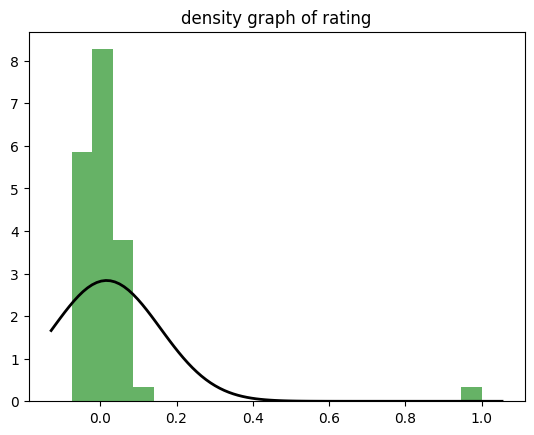

In [64]:
# copied from movies.ipynb

data = corrMat['rating']
data.dropna(inplace=True)

plt.hist(data, bins=20, density=True, alpha=0.6, color='g')
# plt.show()

mu, std = norm.fit(data)

# Plot the PDF of the fitted distribution
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
plt.title("density graph of rating")

In [ ]:
oneDs_selected_dummies[allVars]

## Correlation Matrix

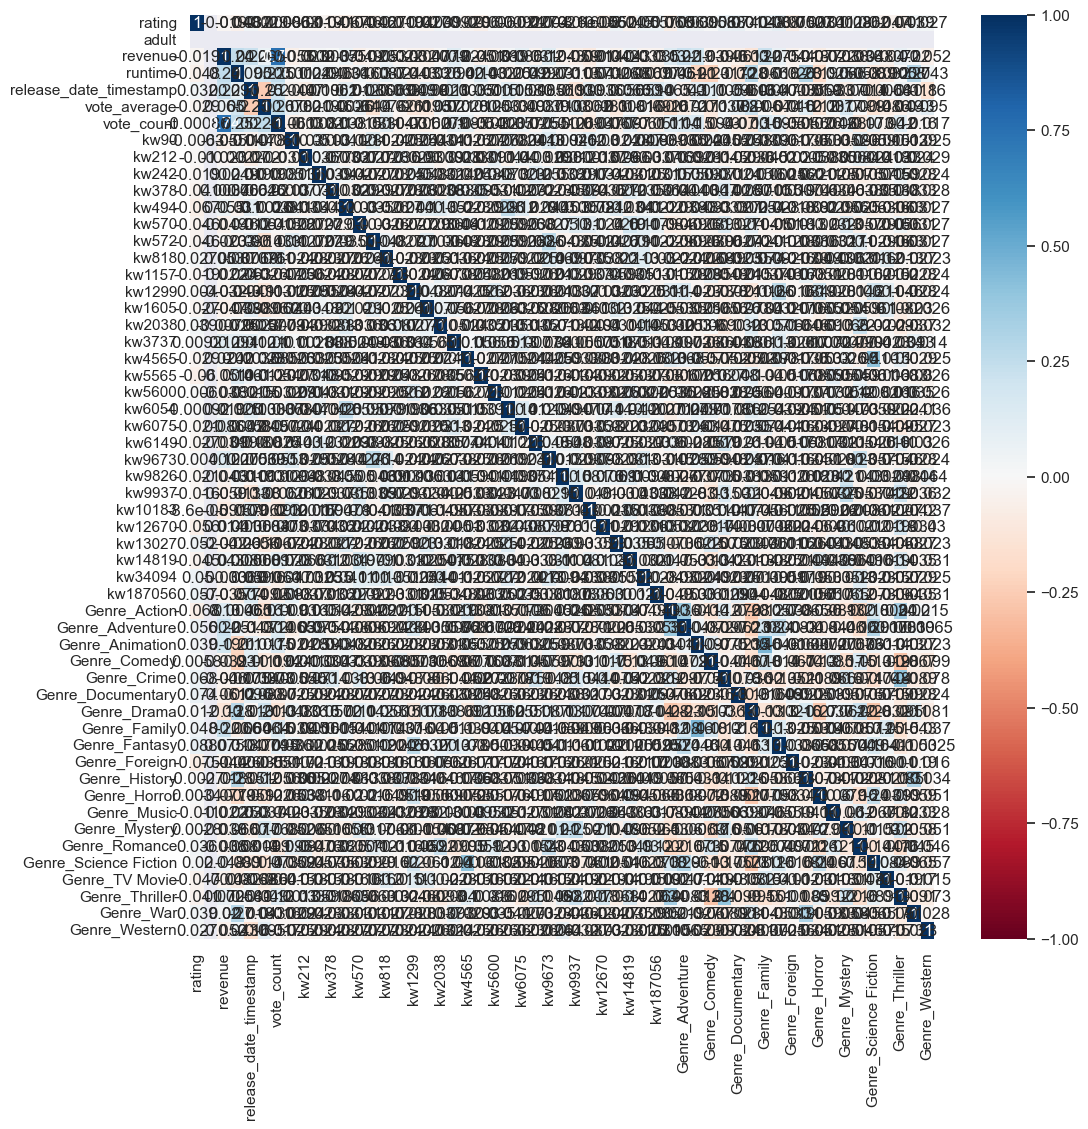

In [65]:
import seaborn as sns
def get_corr_plot(df):
    corr = df.corr()
    sns.set_theme(rc = {'figure.figsize':(12,12)})
    sns.heatmap(corr, cmap='RdBu',annot=True, vmin=-1, vmax=1)
get_corr_plot(oneDs_selected_dummies[allVars]) # too many variables 

In [68]:
oneDs_selected_dummies[allVars]

,rating,adult,budget,popularity,revenue,runtime,release_date_timestamp,vote_average,vote_count,kw90,...,Genre_History,Genre_Horror,Genre_Music,Genre_Mystery,Genre_Romance,Genre_Science Fiction,Genre_TV Movie,Genre_Thriller,Genre_War,Genre_Western
0,3.0,True,0,7.832755,0.0,99.0,7.699968e+08,7.8,246.0,0,...,0,0,0,1,1,0,0,0,0,0
1,4.0,True,21000000,10.234919,227799884.0,105.0,7.408800e+08,6.5,630.0,0,...,0,0,0,0,1,0,0,0,0,0
2,2.0,True,24000000,11.697604,155721132.0,102.0,1.166573e+09,6.5,858.0,0,...,0,0,0,0,0,0,0,0,0,0
3,3.0,True,0,6.285574,29481428.0,109.0,8.558784e+08,5.8,133.0,0,...,0,0,0,0,1,0,0,0,0,0
4,4.0,True,0,3.824884,0.0,83.0,-1.015114e+09,6.8,42.0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
548,3.0,True,60000000,12.915358,77920346.0,108.0,1.145405e+09,5.8,230.0,0,...,0,0,0,0,0,0,0,1,0,0
549,2.0,True,2000000,10.28123,0.0,85.0,6.324480e+08,5.8,18.0,0,...,0,1,0,0,0,1,0,1,0,0
550,2.0,True,14000000,7.469056,116000000.0,159.0,1.562112e+08,7.1,230.0,0,...,0,0,0,0,0,0,0,1,0,0
551,1.0,True,0,1.464329,0.0,100.0,8.156160e+07,6.4,27.0,0,...,0,0,0,0,0,0,0,0,0,1


In [71]:
df = oneDs_selected_dummies[allVars]
df.corr().abs().unstack()

rating         rating                    1.000000
               adult                          NaN
               revenue                   0.018796
               runtime                   0.047609
               release_date_timestamp    0.031827
                                           ...   
Genre_Western  Genre_Science Fiction     0.056627
               Genre_TV Movie            0.014821
               Genre_Thriller            0.072680
               Genre_War                 0.027632
               Genre_Western             1.000000
Length: 3025, dtype: float64

In [67]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, min_corr=0.7):

    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    result =  pd.DataFrame(au_corr.reset_index())
    result.columns = ["col1", 'col2', 'corr']
    return result[result["corr"] > min_corr]

print("Top Absolute Correlations")
high_corr = get_top_abs_correlations(oneDs_selected_dummies[allVars])
# high_corr["lower corr with Y"] = high_corr.apply(lambda row: row["col1"] if abs(np.corrcoef(oneDs_selected_dummies[allVars][row["col1"]], oneDs_selected_dummies[allVars]["Y"])[0][1]) < abs(np.corrcoef(oneDs_selected_dummies[allVars][row["col2"]], oneDs_selected_dummies[allVars]["Y"])[0][1]) else row["col1"], axis=1)
high_corr

Top Absolute Correlations


KeyError: ('kw34094', 'budget')

## Imbalanced data

In [74]:
oneDs_selected_dummies["likeMovie"].value_counts()

False    519
True      34
Name: likeMovie, dtype: int64

# ML problem

Predict if the rating of a movie is above 4

In [75]:
#import ML models
#linear  models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn import linear_model

#categorization models
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn import svm
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, classification_report

In [73]:
#categorical classifier

X = oneDs_selected_dummies[allPossibleVars]
y = oneDs_selected_dummies['likeMovie']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

gnb = GaussianNB().fit(X_train, y_train)
clfSvm = svm.SVC().fit(X_train, y_train)
clfTree = tree.DecisionTreeClassifier().fit(X_train, y_train)
neigh = KNeighborsClassifier(n_neighbors=7).fit(X_train, y_train)

print("KNN accuracy:", neigh.score(X_test,y_test))
print("DTree accuracy: ",clfTree.score(X_test,y_test))
print("SVM accuracy: ",clfSvm.score(X_test,y_test))
print("NB accuracy: ",gnb.score(X_test,y_test))

KNN accuracy: 0.9712230215827338
DTree accuracy:  0.8848920863309353
SVM accuracy:  0.9712230215827338
NB accuracy:  0.9712230215827338


In [76]:
# print(classification_report(y_test, gnb.predict(X_test)))
print("\nKNN:",  classification_report(y_test, neigh.predict(X_test)))
print("\nDTree: ", classification_report(y_test, clfTree.predict(X_test)))
print("\nSVM: ", classification_report(y_test, clfSvm.predict(X_test)))
print("\nNB: ", classification_report(y_test, gnb.predict(X_test)))


KNN:               precision    recall  f1-score   support

       False       0.97      1.00      0.99       135
        True       0.00      0.00      0.00         4

    accuracy                           0.97       139
   macro avg       0.49      0.50      0.49       139
weighted avg       0.94      0.97      0.96       139


DTree:                precision    recall  f1-score   support

       False       0.98      0.90      0.94       135
        True       0.07      0.25      0.11         4

    accuracy                           0.88       139
   macro avg       0.52      0.58      0.52       139
weighted avg       0.95      0.88      0.91       139


SVM:                precision    recall  f1-score   support

       False       0.97      1.00      0.99       135
        True       0.00      0.00      0.00         4

    accuracy                           0.97       139
   macro avg       0.49      0.50      0.49       139
weighted avg       0.94      0.97      0.96       13